#  UNIDAD 2 - PROGRAMACION LINEAR

Ejercicios de la Undad 2 de Matematicas de Ciencias Sociales de 2ºBach

---

## Tabla de Contenidos
  
  1. [Problema l ](#1) 
   
   
  2. [Problema 2 ](#2)


  3. [Problema 3 ](#3)
  
  
  4. [Problema 4 ](#43)

### Adicional:

<a href="http://www.juntadeandalucia.es/educacion/permanente/materiales/index.php?etapa=4&materia=278&unidad=2#space" class="badge badge-primary">Recursos</a>
<a href="http://agrega.juntadeandalucia.es/visualizador-1/Visualizar/Visualizar.do?identificador=es-an_2018081912_9111322&secuencia=true" class="badge badge-success">Problemas</a>
<a href="https://nbviewer.jupyter.org/github/fr98acsta/Mat-Programacion-Lineal/blob/master/Mates_Unidad_2.ipynb" class="badge badge-info">Practicas Unidad 2</a>


In [1]:
from sympy.solvers import solve
from sympy import Symbol
import re
from pulp import * 
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()


### Clase Plot Interseccion Lineal

In [2]:
class Interseccion() :
    eqs = []
    nn = []
    flag = True
    count=0
    x=0
    y=0
    
    def __init__(self):

        while self.flag:
            txt = input("Introduce la primera ecuacion: ")
            if txt == 'q':
                self.flag = False
            else:

                #Check if the string contains any digits (numbers from 0-9):
                x_t = re.sub("(\Ax?)x", lambda y: "+1x" if y.group() == "x" else "-1x", txt)
                x_t = re.sub("=(x?)x", lambda y: "=+1x" if y.group() == "=x" else "=-1x", x_t)
                x_t = re.sub("([-]+[x]?|[+]+[x]?)x", lambda y: "-1y" if y.group() == "-x" else "+1x", x_t)
                x = re.findall("(\d+[x]?|[-]+\d+[x]?|[+]+\d+[x]?)x|=", x_t)
                print(x)

                igual = x.index("")
                x[igual]='='
                #print(x)

                # x[:igual]
                # x[igual+1:]
                x_d = map(float, x[:igual])
                x_i = map(float, x[igual+1:])

                x_d = sum(x_d)
                #print(x_d)
                x_i = sum(x_i)
                #print(x_i)	

                x_fin=x_d-x_i
                #print(x_fin)

                ###################


                y_t = re.sub("(\Ay?)y", lambda y: "+1y" if y.group() == "y" else "-1y", txt)
                y_t = re.sub("=(y?)y", lambda y: "=+1y" if y.group() == "=y" else "=-1y", y_t)
                y_t = re.sub("([-]+[y]?|[+]+[y]?)y", lambda y: "-1y" if y.group() == "-y" else "+1y", y_t)
                y = re.findall("(\d+[y]?|[-]+\d+[y]?|[+]+\d+[y]?)y|=", y_t)
                #print(y)

                igual = y.index("")
                y[igual]='='
                #print(y)

                # y[:igual]
                # y[igual+1:]
                y_d = map(float, y[:igual])
                y_i = map(float, y[igual+1:])

                y_d = sum(y_d)
                #print(y_d)
                y_i = sum(y_i)
                #print(y_i)	

                y_fin=y_d-y_i
                #print(y_fin)

                #################

                n = re.sub("\d+x|\d+y", '', txt)
                #print(n)
                n = re.findall("[-]+\d+|\d+|=", n)

                #print(n)
                igual = n.index("=")
                n_d = map(float, n[igual+1:])
                n_i = map(float, n[:igual])

                n_d = sum(n_d)
                #print(n_d)
                n_i = sum(n_i)
                #print(x_i)	

                n_fin=n_d-n_i
                #print(n_fin)
                self.nn.append(n_fin)
                s = f'eqt{self.count}={[x_fin,y_fin]}'
                exec(s)
                self.eqs.append(1)
                s = f'self.eqs{[self.count]}=eqt{self.count}'
                exec(s)
                #print(self.eqs)


                self.count+=1
                
    def punto(self):
        #print(len(self.eqs))
        if len(self.eqs)==2:
            a = np.append([self.eqs[0]], [self.eqs[1]],axis=0)
        elif len(self.eqs)==3:
            a = np.append([self.eqs[0]], [self.eqs[1]],[self.eqs[2]],axis=0)
        elif len(self.eqs)==4:
            a = np.append([self.eqs[0]], [self.eqs[1]],[self.eqs[2]],[self.eqs[3]],axis=1)
        elif len(self.eqs)==1:
            #print("Has de introducir 2 Ecuaciones")

        #try:
        b = np.append([self.nn],[])

        am =np.linalg.solve(a,b)
        self.y=am[1]
        self.x=am[0]
        self.eqs.clear()
        self.nn.clear()
        #print(f"x => {self.x}\ny => {self.y}")
        
        #except:
         #   print('Vuelvelo a Intentar')

IndentationError: expected an indented block (<ipython-input-2-f0a229421d25>, line 108)

***

#### PROBLEMA 1 <a name="1"></a>

>Una pastelería elabora dos tipos de trufas, dulces y amargas. Cada trufa dulce lleva 20 g de cacao, 20 g de nata y 30g de azúcar y se vende a 1 euro la unidad. Cada trufa amarga lleva 100 g de cacao, 20 g de nata y 15 g de azúcar    se vende a 1.3 euros la unidad.
        
>En un día, la pastelería sólo dispone de 30 kg de cacao, 8 kg de nata y 10.5 kg de azúcar. Sabiendo que vende todo lo que elabora, calcule cuántas trufas de cada tipo deben elaborarse ese día, para maximizar los ingresos, y determine dichos ingresos.

 

In [3]:

TrfaA = pulp.LpVariable("TrfaA", lowBound=0, cat='Integer') 
TrufaD = pulp.LpVariable("TrufaD", lowBound=0, cat='Integer') 
problem = pulp.LpProblem("Problema 1 - Trufas", pulp.LpMaximize) 

problem += TrfaA + 1.3*TrufaD, "Funcion Objetivo" 
problem += TrfaA + 5*TrufaD <= 1500, "1st constraint"
problem += TrfaA + TrufaD <= 400, "2nd constraint"
problem += 2*TrfaA + TrufaD <= 700, "3nd constraint"


problem.solve()
lista=[]
print ("Optimal Result:")
for variable in problem.variables():
    print (variable.name, "=", variable.varValue)
    lista.append(variable.varValue)
print ("Total de ingresos:")
print (f'{value(problem.objective)} €')


C:\Anaconda3\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal Result:
TrfaA = 125.0
TrufaD = 275.0
Total de ingresos:
482.5 €


#### REPRESENTACION 

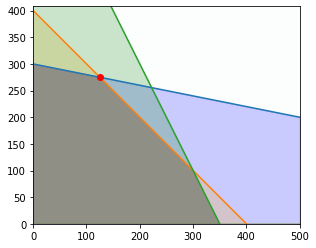

In [6]:

#IMPORTANTISIMO EL np.linspace TIENE 
#LOS DOS PRIMEROS PARAMETROS DE LA DISTANCIA DEL TRAZADO SON: DE LA LA X.
#EL TERCERO A INVESTGAR --- DEFAULT 2000 


x= np.linspace(0,500,2000)
y1= (1500-x)/5
y2= 400-x
y3= 700-2*x 

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.plot(lista[0],lista[1],"ro")

plt.fill_between(x,y1, color='blue', alpha=0.2)
plt.fill_between(x,y2, color='orange', alpha=0.2)
plt.fill_between(x,y3, color='green', alpha=0.2)

plt.xlim((0, 500))
plt.ylim((0, 408))



# Fill feasible region

#IMPORTANTISIMO EL np.linspace TIENE QUE TENER EL TAMAÑO IGUAL AL DE LA X ANTERIOR

d = np.linspace(0,500,2000)

x,y = np.meshgrid(d,d)
region = plt.imshow( ((x + 5*y <= 1500) & (x + y <= 400)& (2*x + y <= 700)).astype(float) , 
               extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
plt.show()

### PROBLEMA  2 <a name="2"></a>

>En la joyería "Mibrillante" fabrican pendientes y sortijas.

>Para hacer unos pendientes  se usan 2 gramos de oro y 1 gramo de plata , mientras que para hacer las sortijas necesitan 2 gramos de oro y 3 gramos de plata.

>Los pendientes los venden a 50€ y las sortijas a 60€.

>Disponen de 400 gramos de oro y 400 gramos de plata.

>Ayuda a los joyeros a decidir cuántas joyas tienen que fabricar de cada tipo para obtener el máximo beneficio.

 

In [7]:
from pulp import * 
Pendientes = pulp.LpVariable('Pendientes', lowBound=0, cat='Integer')
Sortijas = pulp.LpVariable('Sortijas', lowBound=0, cat='Integer')

problem = pulp.LpProblem("Problema 2 - Joyas", pulp.LpMaximize) 

problem += 50*Pendientes + 60*Sortijas, "Funcion Objetivo" 
problem += Pendientes + 3*Sortijas <= 400, "1st constraint"
problem += Pendientes + Sortijas <= 200, "2nd constraint"


problem.solve()
lista=[]
print ("Optimal Result:")
for variable in problem.variables():
    print (variable.name, "=", variable.varValue)
    lista.append(variable.varValue)

ingreso = value(problem.objective)
print ("Total net max profit:")
print (ingreso)


Optimal Result:
Pendientes = 100.0
Sortijas = 100.0
Total net max profit:
11000.0


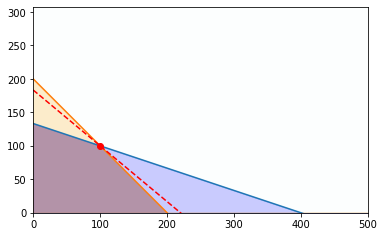

In [8]:
x= np.linspace(0,500,2000)
y1= (400-x)/3
y2= 200-x
y3= (ingreso - 50*x)/60

plt.plot(x, y1)
plt.plot(x, y2)

# funcion objetivo para marcar la linea
plt.plot(x, y3,'r--')


plt.plot(lista[0],lista[1],"ro")

plt.fill_between(x,y1, color='blue', alpha=0.2)
plt.fill_between(x,y2, color='orange', alpha=0.2)

plt.xlim((0, 500))
plt.ylim((0, 308))



# Fill feasible region

#IMPORTANTISIMO EL np.linspace TIENE QUE TENER EL TAMAÑO IGUAL AL DE LA X ANTERIOR

d = np.linspace(0,500,2000)

x,y = np.meshgrid(d,d)
region = plt.imshow( ((x + 3*y <= 400) & (x + y <= 200)).astype(float) , 
               extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
plt.show()

#### PROBLEMA 3 <a name="3"></a>

>La empresa de catering "Kerrico S. A." está diseñando un menú para un comedor escolar. El colegio les informa de que la dieta debe cumplir los siguientes requisitos:


+ El número de calorías no ha de ser inferior a 2000.


+ Debe contener un total de, al menos, 60 gr. de proteínas.


+ Debe contener un total de,  al menos, 80 gr. de grasas. 


>Para ello dispone de dos tipos de platos con las siguientes características:
    
| Tables                  	| Calorías 	| Proteínas 	| Grasas 	|
|-------------------------	|:--------:	|----------:	|--------	|
| Primer Plato (100 gr.)  	| 250      	| 10        	| 15     	|
| Segundo Plato (100 gr.) 	| 800      	| 15        	| 20     	|

>El precio de 100 gramos del primer plato es de 1 € y del segundo plato de 2 €.

>Ayuda a esta empresa a calcular cuántos gramos se deben servir de cada plato para que el coste sea mínimo y cuál es ese coste.

In [9]:
from pulp import * 
Plato1 = pulp.LpVariable('Plato1', lowBound=0)
Plato2 = pulp.LpVariable('Plato2', lowBound=0)

problem = pulp.LpProblem("Problema 3 - Dieta", pulp.LpMinimize) 

problem += Plato1+2*Plato2, "Funcion Objetivo" 
problem += 5*Plato1+16*Plato2>=40, "1st constraint"
problem += 2*Plato1+3*Plato2>=12, "2nd constraint"
problem += 3*Plato1+4*Plato2>=16, "3nd constraint"


problem.solve()
lista=[]
print ("Optimal Result:")
for variable in problem.variables():
    print (variable.name, "=", variable.varValue)
    lista.append(variable.varValue)

ingreso = value(problem.objective)
print ("Coste Minimo:")
print (ingreso)


Optimal Result:
Plato1 = 4.2352941
Plato2 = 1.1764706
Coste Minimo:
6.5882353


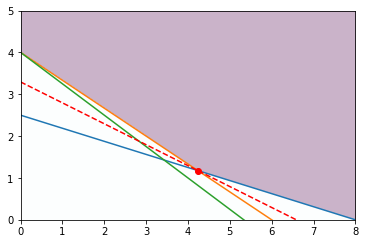

In [10]:
x = np.linspace(0,8,2000)
y1= (40-5*x)/16
y2= (12-2*x)/3
y3= (16 - 3*x)/4
y4= (ingreso - x)/2


plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

# funcion objetivo para marcar la linea
plt.plot(x, y4,'r--')


plt.plot(lista[0],lista[1],"ro")

#plt.fill_between(x,y1, color='blue', alpha=0.2)
#plt.fill_between(x,y2, color='orange', alpha=0.2)
#plt.fill_between(x,y3, color='green', alpha=0.2)

plt.xlim((0, 8))
plt.ylim((0, 5))





# Fill feasible region

#IMPORTANTISIMO EL np.linspace TIENE QUE TENER EL TAMAÑO IGUAL AL DE LA X ANTERIOR
d = np.linspace(0,8,2000)

x,y = np.meshgrid(d,d)
region = plt.imshow( ((5*x+16*y>=40) & (2*x+3*y>=12) & (3*x+4*y>=+16)).astype(float) , 
               extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
plt.show()


### PROBLEMA 4 <a name="4"></a>

>A la empresa TRANS VELOX de transporte ha llegado la oferta del transporte de pescado a las ciudades de Córdoba, Granada y Sevilla. El origen de la mercancía procede de las ciudades de Málaga y Cádiz.

>En la siguiente tabla puedes ver los costes, en euros, de transportar una caja de pescado desde las ciudades costeras a las ciudades interiores:

| Tables 	| Córdoba 	| Granada 	| Sevilla 	|
|:------:	|:-------:	|:-------:	|:-------:	|
|  Cádiz 	|    2    	|    3    	|    1    	|
| Málaga 	|    1    	|    1    	|    2    	|

>La oferta desde la ciudad de Málaga es de 250 cajas, y desde Cádiz es de 150. La demanda desde Sevilla es de 200 cajas, 150 por parte de Córdoba y 50 por parte de Granada.

>¿Cuál es la mejor opción para distribuir el pescado de forma que los costes de transporte sean los más bajos posibles y de forma que todas las ciudades de destino sean totalmente abastecidas con las cantidades demandadas?

> Tenemos pues que elaborar esta tabla dado los datos que nos aporta el problema; para asi poder afrontarlo con mayor facilidad

>| Tables 	| Córdoba 	| Granada 	| Sevilla 	| Oferta 	|
>|:------:	|:-------:	|:-------:	|:-------:	|:-------:	|
>|  Cádiz 	|    X    	|    Y    	|  150-(X+Y) |   150     |
>| Málaga 	|    150-X  |    50-Y  	| 250-(150-(X+Y))|   250    	|
>| Demanda 	|    150   	|    50    	|    200    |  TOTAL: 400 	|

> La función objetivo será el total del número de cajas enviada entre dos ciudades multiplicado por lo que cuesta cada envío:

> **2**x+**1**(150-x)+**3**y+**1**(50-y)+**1**(150-x-y)+**2**(x+y+50)=**2x+3y+450**

> **Min F(x,y)**=2x+3y+450

In [11]:
from pulp import * 
x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)

problem = pulp.LpProblem("Problema 4 - Envios", pulp.LpMinimize) 

problem += 2*x+3*y+450, "Funcion Objetivo"

problem += 0<=x, "1st constraint"
problem += x<=150, "1 constraint"
problem += 0<=y, "2 constraint"
problem += y<=50, "2nd constraint"
problem += x+y<=150, "3 constraint" #oferta Cadiz
problem += x+y>= -50, "4 constraint" #demanda Sevilla


problem.solve()
lista=[]
print ("Optimal Result:")
for variable in problem.variables():
    print (variable.name, "=", variable.varValue)
    lista.append(variable.varValue)

ingreso = value(problem.objective)
print ("Coste Minimo:")
print (ingreso)

Optimal Result:
x = 0.0
y = 0.0
Coste Minimo:
450.0


,,Cordoba,Granada,Sevilla,Oferta
0,Cadiz,0,0,150,150
1,Malaga,150,50,50,250
2,Demanda,150,50,200,TOTAL:400


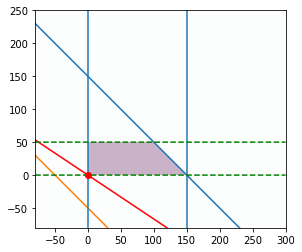

In [54]:
import pandas as pd
x=lista[0]
y=lista[1]

df = pd.DataFrame({
    ' ':['Cadiz','Malaga','Demanda'],
    'Cordoba':[int(x),int(150-x),int(150)],
    'Granada':[int(y),int((50-y)),int(50)],
    'Sevilla':[int(150-(x+y)),int(200-(150-(x+y))),int(200)],
    'Oferta':[int(150),int(250),f'TOTAL:{int(400)}']
})

display(df)

x = np.linspace(-80,300,2000)
y1= 150-x
y2= -50-x
y4= (ingreso - 2*x -450)/3

y5=50+0*x
y6= 0 + 0*x

plt.plot(x, y1)
plt.plot(x, y2)

# funcion objetivo para marcar la linea

plt.axvline(150) 
plt.axvline(0) 
plt.plot(x, y4, 'r')
plt.plot(x, y5, 'g--')
plt.plot(x, y6, 'g--')



plt.plot(lista[0],lista[1],"ro")

#plt.fill_between(x,y1, color='blue', alpha=0.2)
#plt.fill_between(x,y2, color='red', alpha=0.2)


plt.xlim((-80, 300))
plt.ylim((-80, 250))





# Fill feasible region


#a = plt.fill_between(x,y6,y1,where=(x>=0)&(x<=150)&(y5>=y1), color='purple', alpha=0.5)
#b = plt.fill_between(x,y6,y5,where=(x>=0)&(x<=100), color='purple', alpha=0.5)


#IMPORTANTISIMO EL np.linspace TIENE QUE TENER EL TAMAÑO IGUAL AL DE LA X ANTERIOR
d = np.linspace(-80,300,2000)

x,y = np.meshgrid(d,d)
region = plt.imshow( ((0<=x) & (x<=150) & (0<=y) & (y<=50) & (x+y<=150) & (x+y>=-50)).astype(float) , 
               extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
plt.show()


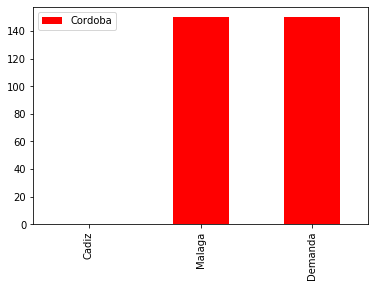

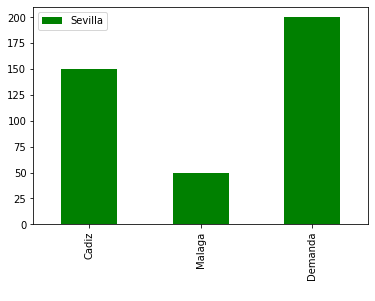

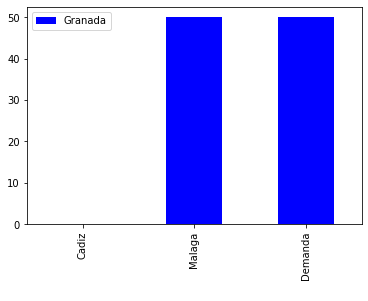

In [62]:
df.plot(kind='bar',x=' ',y='Cordoba',color='red')
df.plot(kind='bar',x=' ',y='Sevilla',color='Green')
df.plot(kind='bar',x=' ',y='Granada',color='blue')

plt.show()